In [2]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [3]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    


In [4]:
# Now define our aliased drawing function
def lineAA(canvas, x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    # init
    d = 2 * dy - dx
    y = y0
    two_v_dx = 0
    def get_aa_intensity(dist):
        return min(1.0, abs(dist))
    for x in range(x0, x1 + 1):

        denom = (2 * np.sqrt(dx**2 + dy**2))

        D = two_v_dx / denom
        D_up = (2 * dx - two_v_dx) / denom
        D_down = (2 * dx + two_v_dx) / denom
        canvas[(N - 1) - y, x] = get_aa_intensity(D)
        canvas[(N - 1) - (y + 1), x] = get_aa_intensity(D_up)
        canvas[(N - 1) - (y - 1), x] = get_aa_intensity(D_down)

        if d < 0:
            # midpoint above line, choose E
            two_v_dx = d + dx        
            d = d + 2 * dy
        else:
            # midpoint below line, choose NE
            two_v_dx = d - dx
            d = d + 2 * (dy - dx)
            y = y + 1
    return canvas


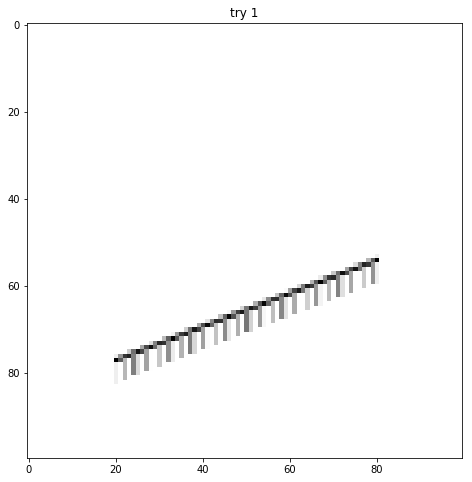

In [6]:
# Draw thick line with thicness of 5 pixels

canvas = reset_canvas(N)
for jj in range(-2,3):
    canvas = lineAA(canvas, 20, 20+jj, 80, 43+jj)
show_canvas(canvas, "try 1")

In [7]:
# Now define our aliased drawing function (fixed)
def draw(canvas, x, y, v):
    canvas[(N - 1) - y, x] = min(canvas[(N - 1) - y, x], v)
    return canvas

def lineAA(canvas, x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    # init
    d = 2 * dy - dx
    y = y0
    two_v_dx = 0
    def get_aa_intensity(dist):
        return min(1.0, abs(dist))
    for x in range(x0, x1 + 1):

        denom = (2 * np.sqrt(dx**2 + dy**2))

        D = two_v_dx / denom
        D_up = (2 * dx - two_v_dx) / denom
        D_down = (2 * dx + two_v_dx) / denom
        canvas = draw(canvas, x, y, get_aa_intensity(D))
        canvas = draw(canvas, x, y+1, get_aa_intensity(D_up))
        canvas = draw(canvas, x, y-1, get_aa_intensity(D_down))

        if d < 0:
            # midpoint above line, choose E
            two_v_dx = d + dx        
            d = d + 2 * dy
        else:
            # midpoint below line, choose NE
            two_v_dx = d - dx
            d = d + 2 * (dy - dx)
            y = y + 1
    return canvas

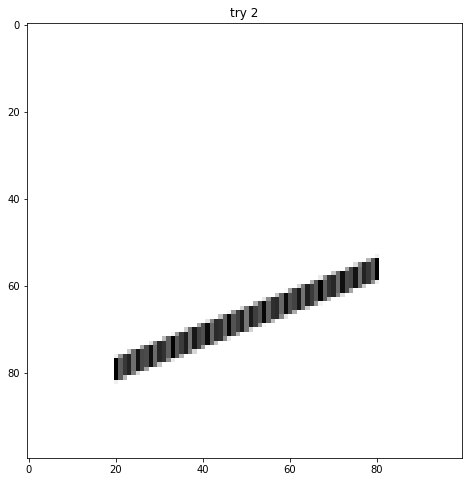

In [8]:
# Draw thick line with thicness of 5 pixels

canvas = reset_canvas(N)
for jj in range(-2,3):
    canvas = lineAA(canvas, 20, 20+jj, 80, 43+jj)
show_canvas(canvas, "try 2")

In [9]:
# This time also without AA lines
def line(canvas, x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    # init
    d = 2 * dy - dx
    y = y0
    for x in range(x0, x1 + 1):

        canvas = draw(canvas, x, y, 0)

        if d < 0:
            # midpoint above line, choose E
            d = d + 2 * dy
        else:
            # midpoint below line, choose NE
            d = d + 2 * (dy - dx)
            y = y + 1
    return canvas

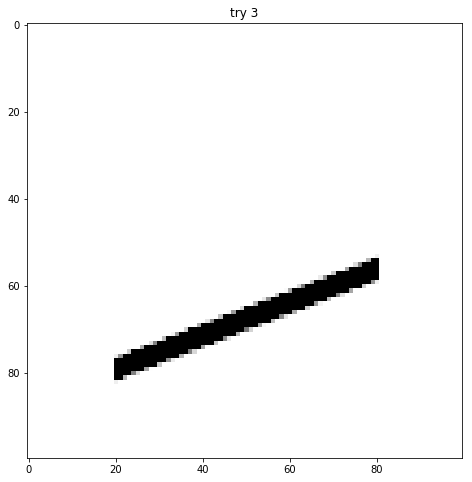

In [14]:

canvas = reset_canvas(N)
canvas = lineAA(canvas, 20, 20-2, 80, 43-2)
for jj in range(-2,3):
    canvas = line(canvas, 20, 20+jj, 80, 43+jj)
canvas = lineAA(canvas, 20, 20+2, 80, 43+2)
show_canvas(canvas, "try 3")